In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import astropy.io.fits as pyfits
import astropy.wcs as w
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
import astropy.units as u
import MockImageFunctions
from matplotlib.colors import LogNorm
from scipy import ndimage
from skimage.transform import resize
%matplotlib inline

original skirt (200, 500, 500)
2.065442373 arcsec


21488
/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/wfc3_ir_f160w_150.1726630421_2.4264958056.fits


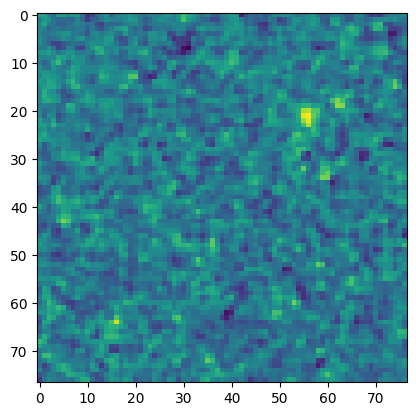

/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/acs_wfc_f606w_150.1190985349_2.300631347.fits


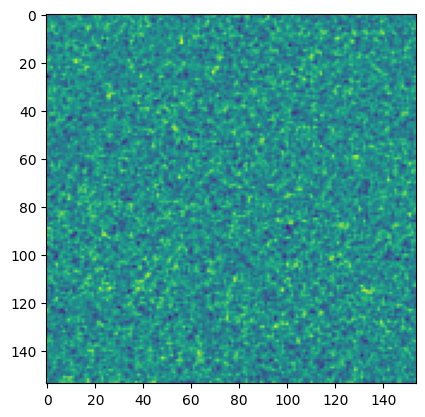

/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/wfc3_ir_f125w_150.1608837615_2.3545137154.fits


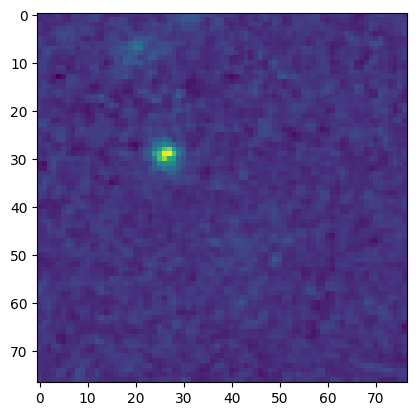

/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/acs_wfc_f606w_150.1737641978_2.4311123516.fits


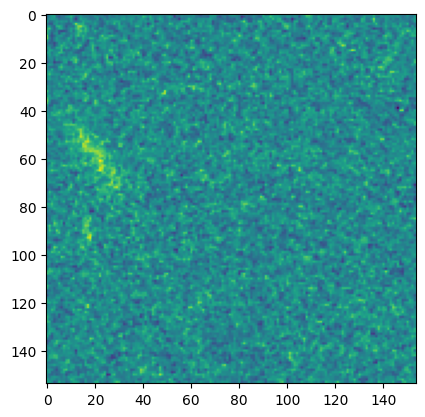

/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/wfc3_ir_f160w_150.1691228647_2.3219636231.fits


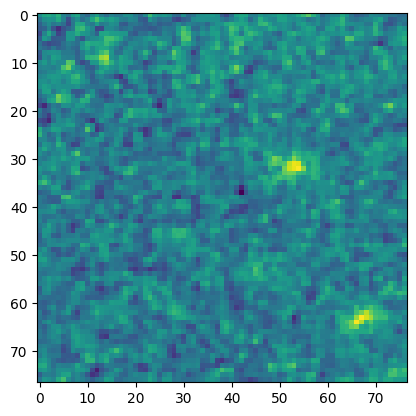

/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/wfc3_ir_f125w_150.120166145_2.3333478826.fits


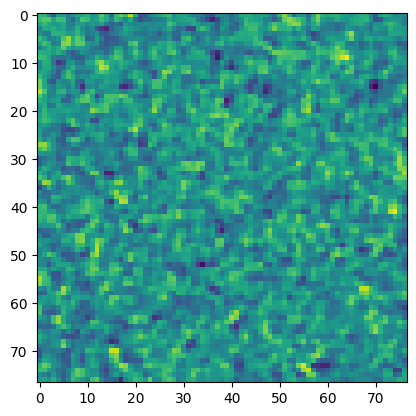

/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/wfc3_ir_f160w_150.1615036231_2.4428126171.fits


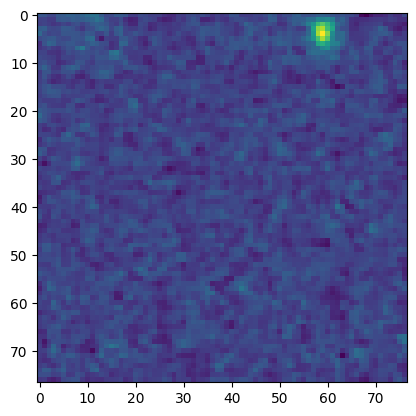

/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/acs_wfc_f606w_150.17908228_2.3521130337.fits


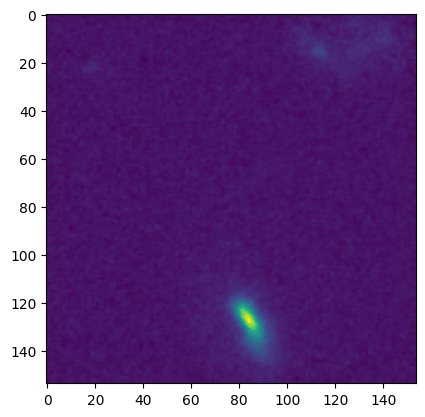

/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/wfc3_ir_f160w_150.1961173959_2.430244565.fits


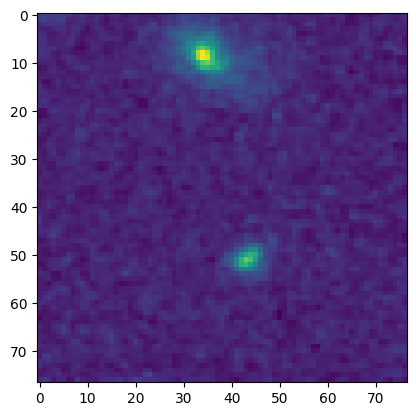

/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/acs_wfc_f606w_150.1310910839_2.2567146823.fits


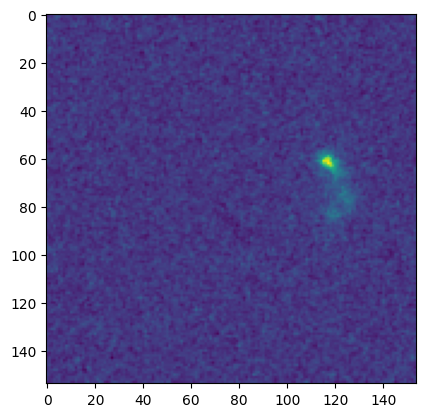

In [3]:
backgrounds = glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/*.fits')
print(len(backgrounds))
for b in backgrounds[0:10]:
    #print(b)
    im = pyfits.open(b)
    imd = im[0].data
    #print(np.std(imd))
    print(b)
    #print(np.std(imd))
    plt.figure()
    plt.imshow(imd)
    plt.show()
    im.close()

This code combines background cutouts and mocks with no background into full useable mock images. Just replace the redshift and directory path names

In [3]:
fullcoords = np.loadtxt('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/RADec40.txt', dtype = object)
print(fullcoords)
len(fullcoords)/2

['150.1702435096_2.4066628566' '150.1938166093_2.454510917'
 '150.13312668_2.31749786' ... '150.1405323196_2.2926811658'
 '150.1615014231_2.3702302357' '150.1770628562_2.3259632847']


5372.0

In [4]:
a = np.array(['1', '2'])
type(a[1])

numpy.str_

In [5]:
backgroundfits125 = glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/wfc3_ir_f125w*.fits')

print(len(backgroundfits125))


backgroundfits125[9][83:-5]

5372


'_150.1916432418_2.3607956767'

In [ ]:
bim = pyfits.open('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/acs_wfc_f814w_150.1916432418_2.3607956767.fits')
bim = bim[0].data
print(np.shape(bim))

#77
#202

(154, 154)


In the cell below and a few cells down, we need to replace the image sizes to the sizes appropriate for this redshift

Going to try stretching the final image instead

In [17]:
#some are cut from the edges of the mosaic so make sure we just fill with zeros and move on. 
for file in glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/z1noRT/wfc3_ir_f125w*.fits'):
    hdul = pyfits.open(file)
    background = hdul[0].data
    np.save(file[:-4] + 'npy', background)


        
for file in glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/z1noRT/wfc3_ir_f160w*.fits'):
    hdul = pyfits.open(file)
    background = hdul[0].data
    np.save(file[:-4] + 'npy', background)
    
        
for file in glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/z1noRT/acs_wfc_f606w*.fits'):
    hdul = pyfits.open(file)
    background = hdul[0].data
    np.save(file[:-4] + 'npy', background)

        
for file in glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/z1noRT/acs_wfc_f814w*.fits'):
    hdul = pyfits.open(file)
    background = hdul[0].data
    np.save(file[:-4] + 'npy', background)
        

In [8]:
# #some are cut from the edges of the mosaic so make sure we just fill with zeros and move on. 
# for file in glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/wfc3_ir_f125w*.fits'):
#     hdul = pyfits.open(file)
#     background = hdul[0].data
#     if np.shape(background)[0] < 101 or np.shape(background)[1] < 101:
#         #print(file[:-4])
#         pad_tot0 = 101-np.shape(background)[0]
#         pad0 = int(pad_tot0/2)
#         pad_tot1 = 101-np.shape(background)[1]
#         pad1 = int(pad_tot1/2)
#         #print(pad0)
#         background = np.pad(background, ((pad0, pad0), (pad1, pad1)), mode='constant', constant_values=0)
#         #print(np.shape(background))
#         np.save(file[:-4] + 'npy', background)
#     else:
#         np.save(file[:-4] + 'npy', background)
#         #print(np.shape(background), file)

        
# for file in glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/wfc3_ir_f160w*.fits'):
#     hdul = pyfits.open(file)
#     background = hdul[0].data
#     if np.shape(background)[0] < 101 or np.shape(background)[1] < 101:
#         #print(file[:-4])
#         pad_tot0 = 101-np.shape(background)[0]
#         pad0 = int(pad_tot0/2)
#         pad_tot1 = 101-np.shape(background)[1]
#         pad1 = int(pad_tot1/2)
#         #print(pad0)
#         background = np.pad(background, ((pad0, pad0), (pad1, pad1)), mode='constant', constant_values=0)
#         #print(np.shape(background))
#         np.save(file[:-4] + 'npy', background)
#     else:
#         np.save(file[:-4] + 'npy', background)
#         #print(np.shape(background), file)       
        
# for file in glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/acs_wfc_f606w*.fits'):
#     hdul = pyfits.open(file)
#     background = hdul[0].data
#     if np.shape(background)[0] < 202 or np.shape(background)[1] < 154:
#         #print(file[:-4])
#         pad_tot0 = 202-np.shape(background)[0]
#         pad0 = int(pad_tot0/2)
#         pad_tot1 = 202-np.shape(background)[1]
#         pad1 = int(pad_tot1/2)
#         #print(pad0)
#         background = np.pad(background, ((pad0, pad0), (pad1, pad1)), mode='constant', constant_values=0)
#         #print(np.shape(background))
#         np.save(file[:-4] + 'npy', background)
#     else:
#         np.save(file[:-4] + 'npy', background)
#         #print(np.shape(background), file)
        
# for file in glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/acs_wfc_f814w*.fits'):
#     hdul = pyfits.open(file)
#     background = hdul[0].data
#     print(np.shape(background))
#     if np.shape(background)[0] < 202 or np.shape(background)[1] < 202:
#         #print('hi')
#         pad_tot0 = 202-np.shape(background)[0]
#         pad0 = int(pad_tot0/2)
#         pad_tot1 = 202-np.shape(background)[1]
#         pad1 = int(pad_tot1/2)
#         #print(pad0)
#         background = np.pad(background, ((pad0, pad0), (pad1, pad1)), mode='constant', constant_values=0)
#         print(np.shape(background))
#         np.save(file[:-4] + 'npy', background)
#     else:
#         #print('hey', np.shape(background))
#         np.save(file[:-4] + 'npy', background)
#         #print(np.shape(background), file)

In [7]:
print(len(glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/z1/wfc3_ir_f125w*.fits')))

4006


In [10]:
coord = []
for file in backgroundfits125:
    coords = file[83:-5]
    coord.append(coords)
#coord

In [11]:
len(coord)

5372

In [3]:
mocktable = pd.read_csv('SubhaloListForMakeMocks50.csv')
print(len(mocktable))

3120


In [7]:
mocks_have = glob('/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/z1/*f125w.npy')
print(len(mocks_have))


0


In [14]:
mocktable['RA Dec'] = coord[0:len(mocktable)]
mocktable

,Unnamed: 0,Subfind_ID,Viewpoint,Type,RA Dec
0,0,289514,1,Descendant,_150.1608837615_2.3545137154
1,1,289514,2,Descendant,_150.120166145_2.3333478826
2,2,289514,3,Descendant,_150.1300249081_2.4001305995
3,3,289514,4,Descendant,_150.1754419857_2.2534468944
4,4,289514,5,Descendant,_150.1745470762_2.401579412
...,...,...,...,...,...
5347,5347,637071,2,0.0,_150.1423340796_2.311031079
5348,5348,637071,3,0.0,_150.1680721408_2.3258803097
5349,5349,637071,4,0.0,_150.1326759178_2.2815146338
5350,5350,637071,5,0.0,_150.1588294339_2.2632141294


In [15]:
mocktable.to_csv('SubhaloList_WithBackgroundCoords_ForMakeMocks40.csv')

In [29]:
mocktable = pd.read_csv('SubhaloList_WithBackgroundCoords_ForMakeMocks40.csv')

In [30]:
backgroundpath = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/background_cutouts/z15/'
mockpath = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/z15/'
fullmockpath = '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/'

In [31]:
m = np.load(mockpath + str(mocktable['Subfind_ID'][0]) + '_' + str(mocktable['Viewpoint'][0]) + 'wfc3_ir_f125w' + '.npy')
m2 = np.load(mockpath + str(mocktable['Subfind_ID'][0]) + '_' + str(mocktable['Viewpoint'][0]) + 'acs_wfc_f814w' + '.npy')
print(np.shape(m))
print(np.shape(m2))

(77, 77)
(153, 153)


In [40]:
def AddBackground(datatable, hstfilter, z,backgroundpath = backgroundpath, mockpath = mockpath):
    for index, row in datatable.iterrows():
        try:
            #hdul = pyfits.open(backgroundpath + hstfilter + str(row['RA Dec']) + '.fits')
            #background = hdul[0].data
            #print(np.shape(data))
            if z == 1:
                background = np.load(backgroundpath + hstfilter + '_' + str(row['RA Dec']) + '.npy')
            elif z == 1.5:
                background = np.load(backgroundpath + hstfilter + str(row['RA Dec']) + '.npy')

            #print(str(row['Subfind_ID']))
            #print('background', np.shape(background))
            # if z == 1:
            mockim = np.load(mockpath + str(row['Subfind_ID']) + '_' + str(row['Viewpoint']) + hstfilter + '.npy')

            # elif z==1.5:
            #     mockim = np.load(mockpath + str(row['Subfind_ID']) + str(row['Viewpoint']) + hstfilter + '.npy')
            #print('image', np.shape(mockim))
            ### adding 0 padding to mock image first so it's the same size as background
            #print('orig', np.shape(background)) #for some reason background is 2 bigger than  image on each side
            if z == 1.5:
                if hstfilter == 'wfc3_ir_f125w' or hstfilter == 'wfc3_ir_f160w':
                    # mockim = mockim[0:101,0:101]
                    # background = background[0:101,0:101]
                    pad_tot0 = 77-np.shape(mockim)[0] #77
                    pad0 = int(pad_tot0/2)
                    pad_tot1 = 77-np.shape(mockim)[1]
                    pad1 = int(pad_tot1/2)
                    mockim = np.pad(mockim, ((pad0, pad0), (pad1, pad1)), mode='constant', constant_values=0)
                    #print('update', np.shape(background))
                else:
                    # mockim = mockim[0:202,0:202]
                    # background = background[0:202,0:202] 
                    pad_tot0 = 154-np.shape(mockim)[0] #154
                    pad0 = int(pad_tot0/2)
                    #print(pad0)
                    pad_tot1 = 154-np.shape(mockim)[1]
                    pad1 = int(pad_tot1/2)
                    mockim = np.pad(mockim, ((pad0, pad0+1), (pad1, pad1+1)), mode='constant', constant_values=0) #+1 needed if pad is an odd number
                    #print('update', np.shape(mockim))
            fullmock = mockim + background
            #print('full shape', np.shape(fullmock))
            #print(type(fullmock))
            np.save(fullmockpath + 'full_' + str(row['Subfind_ID'])+'_' + str(row['Viewpoint'])+ '_'+ hstfilter + '.npy', fullmock)
        except Exception as e: 
            print(e)

In [41]:
AddBackground(mocktable, 'wfc3_ir_f125w', z = 1.5) #'acs_wfc_f814w''wfc3_ir_f125w'
AddBackground(mocktable, 'wfc3_ir_f160w', z = 1.5)
AddBackground(mocktable, 'acs_wfc_f606w', z = 1.5)
AddBackground(mocktable, 'acs_wfc_f814w', z = 1.5)

[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/z15/0_1wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/z15/0_2wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/z15/0_3wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/z15/0_4wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/z15/0_5wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/z15/0_6wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/mocks_nobackground/z15/15216_1wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/

In [37]:
def StretchToMatchz1(datatable, hstfilter, fullmockpath = fullmockpath):
    for index, row in datatable.iterrows():
        try:
            fullmock = np.load(fullmockpath + 'full_' + str(row['Subfind_ID'])+'_' + str(row['Viewpoint'])+ '_'+ hstfilter + '.npy')
            if hstfilter == 'wfc3_ir_f125w' or hstfilter == 'wfc3_ir_f160w':
                fullmock = resize(fullmock, (101,101))
            else:
                fullmock = resize(fullmock, (202,202))
            np.save(fullmockpath + 'full_' + str(row['Subfind_ID'])+'_' + str(row['Viewpoint'])+ '_'+ hstfilter + '.npy', fullmock)
        except Exception as e:
            print(e)

In [38]:
StretchToMatchz1(mocktable, 'wfc3_ir_f125w')
StretchToMatchz1(mocktable, 'wfc3_ir_f160w')
StretchToMatchz1(mocktable, 'acs_wfc_f606w')
StretchToMatchz1(mocktable, 'acs_wfc_f814w')

[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/full_0_1_wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/full_0_2_wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/full_0_3_wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/full_0_4_wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/full_0_5_wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/full_0_6_wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/aschechter/fullmocks/z15/full_15216_1_wfc3_ir_f125w.npy'
[Errno 2] No such file or directory: '/n/holystore01/LABS/hernquist_lab/Users/a

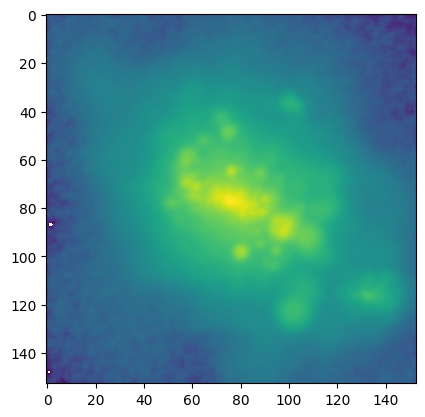

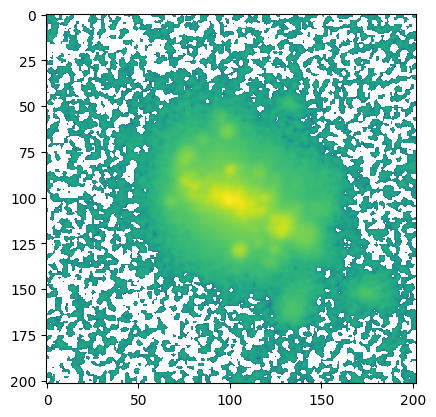

In [39]:
%matplotlib inline
mock = np.load(mockpath + '478489_4acs_wfc_f814w.npy')
full = np.load(fullmockpath + 'full_478489_4_acs_wfc_f814w.npy' )
plt.figure()
plt.imshow(mock,norm=LogNorm())
plt.show()
    
plt.figure()
plt.imshow(full,norm=LogNorm())
plt.show()
    
# plt.figure()
# plt.imshow(full - mock, norm=LogNorm())
# plt.show()
    

In [40]:
def MakeFullMock(datatable, fullmockpath = fullmockpath):
    for index, row in datatable.iterrows():
        try:
            f125 = np.load(fullmockpath + 'full_' + str(row['Subfind_ID'])+'_' + str(row['Viewpoint'])+'_wfc3_ir_f125w.npy')
            f160 = np.load(fullmockpath + 'full_' + str(row['Subfind_ID'])+'_' + str(row['Viewpoint'])+'_wfc3_ir_f160w.npy')
            f606 = np.load(fullmockpath + 'full_' + str(row['Subfind_ID'])+'_' + str(row['Viewpoint'])+'_acs_wfc_f606w.npy')
            f814 = np.load(fullmockpath + 'full_' + str(row['Subfind_ID'])+'_' + str(row['Viewpoint'])+'_acs_wfc_f814w.npy')
            
            print('f125', np.shape(f125))
            # print(np.shape(f606))
            #have to rebin the low resolution filter "up" in pixel resolution
            rebin_scale = np.shape(f814)[0] / np.shape(f125)[0]
            #print(rebin_scale)
            f125 = ndimage.zoom(f125, rebin_scale)
            f160 = ndimage.zoom(f160, rebin_scale)
            print('f160', np.shape(f160))
            allfilters = np.stack([f125, f160, f606, f814], axis=0)
            print('all', np.shape(allfilters))
            if np.shape(allfilters)[0] == 4:
                allfilters = np.transpose(allfilters, (2,1,0))
                print('all2', np.shape(allfilters))
            np.save(fullmockpath + 'allfilters' + str(row['Subfind_ID'])+ '_' + str(row['Viewpoint']) + '.npy', allfilters)
        except Exception as e:
            print(e)

In [41]:
MakeFullMock(mocktable)

f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
all (4, 202, 202)
all2 (202, 202, 4)
f125 (101, 101)
f160 (202, 202)
al

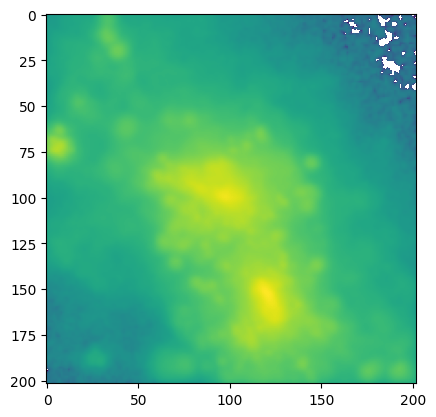

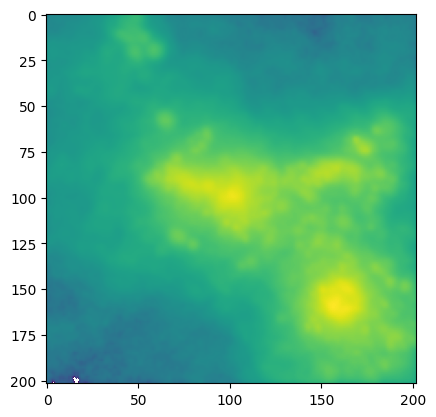

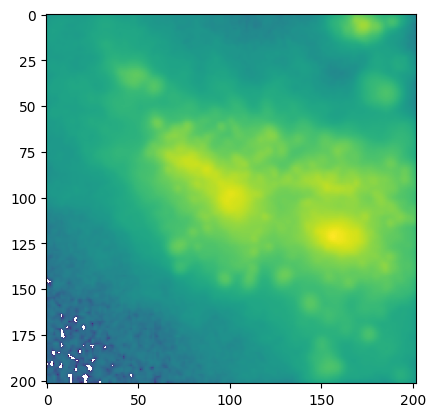

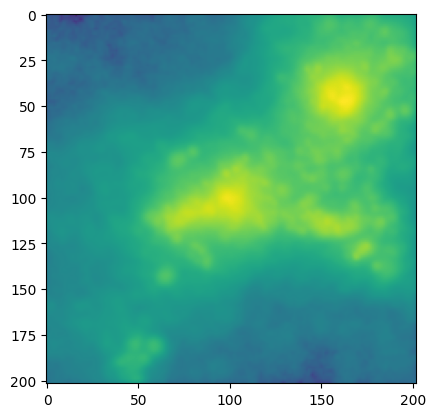

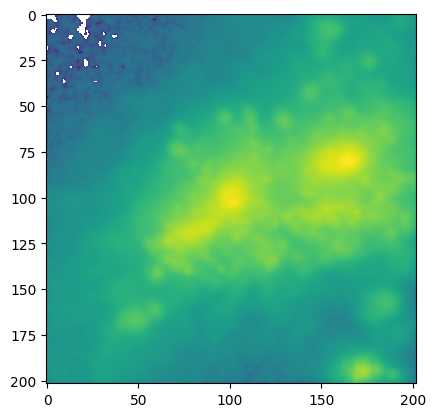

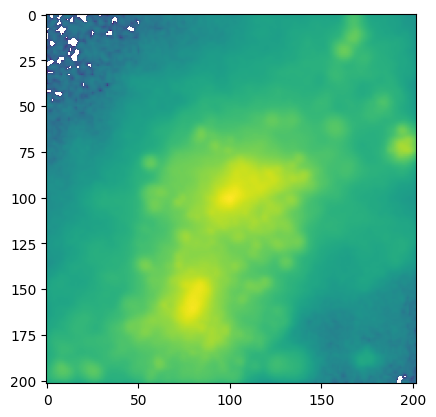

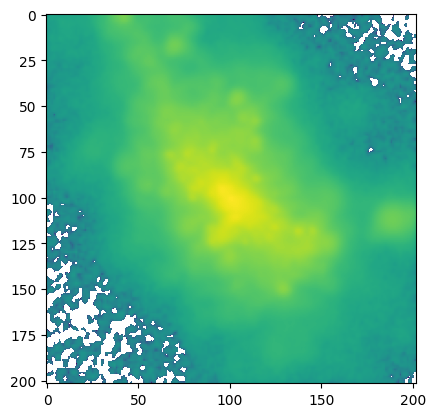

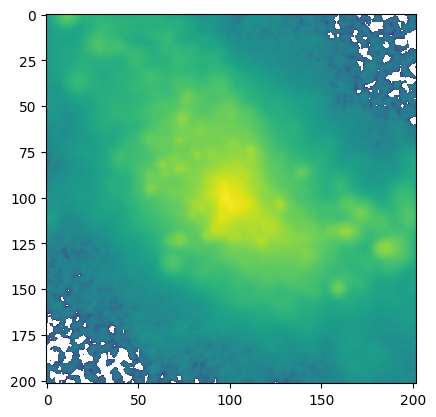

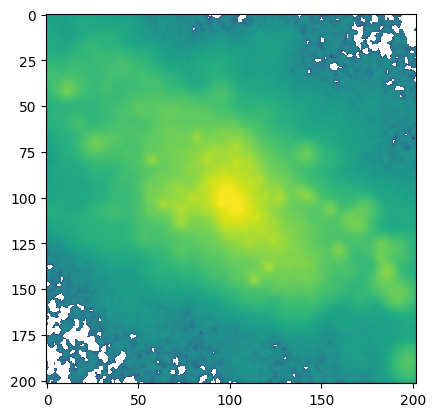

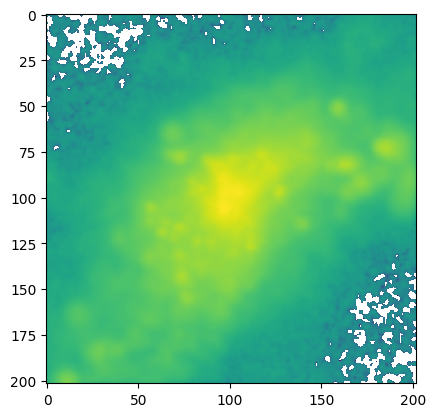

In [42]:
for index, row in mocktable[0:10].iterrows():
    fullim = np.load(fullmockpath + 'allfilters' + str(row['Subfind_ID'])+ '_' + str(row['Viewpoint']) + '.npy')
    fullim = np.sum(fullim, axis =2)
    plt.figure()
    plt.imshow(fullim, norm=LogNorm())
    plt.show()

This is with help from ChatGPT to see if any full mocks are exactly the same -- they shouldn't be!

In [43]:
import hashlib
import os


def hash_array(arr):
    """Generate a hash for a numpy array."""
    return hashlib.sha256(arr.tobytes()).hexdigest()

def check_for_duplicates(directory):
    """Check if there are any duplicate arrays in .npy files in the given directory."""
    seen_hashes = set()
    for filename in os.listdir(directory):
        if filename.endswith(".npy"):
            file_path = os.path.join(directory, filename)
            # Load the numpy array
            arr = np.load(file_path)
            # Get the hash of the array
            arr_hash = hash_array(arr)
            # Check if the hash already exists
            if arr_hash in seen_hashes:
                print(f"Duplicate found: {filename}")
            else:
                seen_hashes.add(arr_hash)
        else:
            print(f"Skipping non-npy file: {filename}")

# Example usage
#directory = "path/to/your/npy/files"
check_for_duplicates(fullmockpath)

In [44]:
check_for_duplicates(mockpath)

KeyboardInterrupt: 